In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
K = np.array([[0.00337701],       [0.01549156],
       [0.05065756],
       [0.11808084],
       [0.19620069],
       [0.23238471],
       [0.19620069],
       [0.11808084],
       [0.05065756],
       [0.01549156],
       [0.00337701]])

In [19]:
T = K.T

In [20]:
T

array([[0.00337701, 0.01549156, 0.05065756, 0.11808084, 0.19620069,
        0.23238471, 0.19620069, 0.11808084, 0.05065756, 0.01549156,
        0.00337701]])

In [21]:
k2 = K * T

In [22]:
k2

array([[1.14041965e-05, 5.23151530e-05, 1.71071087e-04, 3.98760177e-04,
        6.62571692e-04, 7.84765490e-04, 6.62571692e-04, 3.98760177e-04,
        1.71071087e-04, 5.23151530e-05, 1.14041965e-05],
       [5.23151530e-05, 2.39988431e-04, 7.84764630e-04, 1.82925642e-03,
        3.03945476e-03, 3.60000168e-03, 3.03945476e-03, 1.82925642e-03,
        7.84764630e-04, 2.39988431e-04, 5.23151530e-05],
       [1.71071087e-04, 7.84764630e-04, 2.56618839e-03, 5.98168724e-03,
        9.93904823e-03, 1.17720424e-02, 9.93904823e-03, 5.98168724e-03,
        2.56618839e-03, 7.84764630e-04, 1.71071087e-04],
       [3.98760177e-04, 1.82925642e-03, 5.98168724e-03, 1.39430848e-02,
        2.31675423e-02, 2.74401818e-02, 2.31675423e-02, 1.39430848e-02,
        5.98168724e-03, 1.82925642e-03, 3.98760177e-04],
       [6.62571692e-04, 3.03945476e-03, 9.93904823e-03, 2.31675423e-02,
        3.84947108e-02, 4.55940404e-02, 3.84947108e-02, 2.31675423e-02,
        9.93904823e-03, 3.03945476e-03, 6.62571692e-

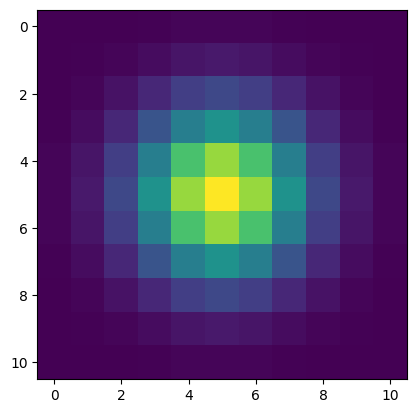

In [25]:
plt.imshow(k2)
plt.show()

In [7]:
kernel = cv2.getGaussianKernel(11, 1.718)

In [8]:
kernel

array([[0.003366  ],
       [0.01546162],
       [0.050612  ],
       [0.11806185],
       [0.19625615],
       [0.23248477],
       [0.19625615],
       [0.11806185],
       [0.050612  ],
       [0.01546162],
       [0.003366  ]])

In [13]:
type(kernel)

numpy.ndarray

In [1]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt



ImportError: DLL load failed while importing _imaging: Não foi possível encontrar o módulo especificado.

In [ ]:
plt.imshow(sample_semantic_mask)
plt.show()

In [ ]:
kernel = np.ones((3,3))
dilated_mask = cv2.dilate(pixel_mask, kernel, iterations=1)